## Data Description (Just write a few sentences)
1. a high-level description of the data: what it is, where it came from, the time period it covers, number of fields, number of records (just a few sentences). This section is short.
2. Summary Tables
Then a two field summary tables listing all fields with summary information:
One table for numeric fields containing these columns:
% populated, min, max, mean, standard deviation, % zeros
Datetime: min, max (can put this in the numeric table), % zero
A second table for categorical fields containing these columns:
% populated, # unique values, most common field value
3. Visualization of Each Field
Then for each field* in the order they appear in the data:
Short description of the field, then a “picture”:
Numeric: a distribution, noting any outliers that are omitted (e.g., covers 98% of records)
Categorical: a bar chart/histogram or a table of the top 10 to 20 field values
Datetime: probably a plot showing #records by date/time, or anything else that makes sense
Make good choices of ranges, scales (linear or log), label font sizes



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("applications data.csv")
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
0,1,20170101,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0
1,2,20170101,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1
2,3,20170101,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0
3,4,20170101,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0
4,5,20170101,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0
...,...,...,...,...,...,...,...,...,...,...
999995,999996,20171231,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0
999996,999997,20171231,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0
999997,999998,20171231,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0
999998,999999,20171231,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0


In [4]:
data.describe(include = 'all')

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label
count,1000000.000000,1.000000e+06,1.000000e+06,1000000,1000000,1000000,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
unique,NaN,NaN,NaN,78136,177001,828774,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,EAMSTRMT,ERJSAXA,123 MAIN ST,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,12658,8580,1079,NaN,NaN,NaN,NaN
mean,500000.500000,2.017067e+07,5.083415e+08,NaN,NaN,NaN,50073.333143,1.951725e+07,5.368716e+09,0.014393
std,288675.278933,3.449869e+02,2.934864e+08,NaN,NaN,NaN,28915.921546,3.568872e+05,3.082161e+09,0.119104
min,1.000000,2.017010e+07,3.600000e+01,NaN,NaN,NaN,2.000000,1.900010e+07,5.937990e+05,0.000000
25%,250000.750000,2.017040e+07,2.542176e+08,NaN,NaN,NaN,24992.000000,1.916092e+07,2.677134e+09,0.000000
50%,500000.500000,2.017070e+07,5.088144e+08,NaN,NaN,NaN,50492.000000,1.950090e+07,5.399910e+09,0.000000
75%,750000.250000,2.017100e+07,7.630924e+08,NaN,NaN,NaN,74496.000000,1.983032e+07,8.109241e+09,0.000000


# 1. Numerical Summary Table

- Columns: % Populated, Min, Max, Mean, Standard Deviation, % zeros 
- Datetime: min, max (can put this in the numeric table), % zero
- Numerical fields: date
- Categorical fields: record, ssn, dob, homephone, fraud label
- what is zip5?

In [5]:
data['appyear'] = (data['date'] / 10000).astype('int')
data['appmonth'] = ((data['date'] - data['appyear'] * 10000) / 100).astype('int')
data['appday'] = data['date'] - data['appyear'] * 10000 - data['appmonth'] * 100
data['date'] = pd.to_datetime(data.appyear*10000+data.appmonth*100+data.appday,format='%Y%m%d')
data

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,appyear,appmonth,appday
0,1,2017-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,19070626,1797504115,0,2017,1,1
1,2,2017-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,2017,1,1
2,3,2017-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,19070626,216537580,0,2017,1,1
3,4,2017-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,2017,1,1
4,5,2017-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,2017,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,999996,2017-12-31,766104848,XUSAAURMZ,EJXXEXZX,8079 EJRUJ AVE,54890,19550418,8236558223,0,2017,12,31
999996,999997,2017-12-31,445178058,SAAJJEMTX,UMAUETJX,4817 UMSXT AVE,74683,19150624,6790134432,0,2017,12,31
999997,999998,2017-12-31,25283410,ESRXXRSUX,EUEJRJJE,7562 RJMAZ ST,86805,19880628,3997657622,0,2017,12,31
999998,999999,2017-12-31,361232148,XXMZSRXMA,RSRSUJSS,3408 UZZAM WY,49183,20120302,5935293731,0,2017,12,31


In [ ]:
# It will print the datetime object
print(datetime_obj)
 
# extract the time from datetime_obj
date = datetime_obj.date()
print(date)

In [96]:
import datetime
from datetime import datetime
newdate = []
for i in data['date']:
    date = i.date()
    newdate.append(date)

In [98]:
data['date'] = newdate
data['date'][0]

datetime.date(2017, 1, 1)

In [6]:
df = pd.DataFrame(columns=['Field Name', '% Populated', 'Min', 'Max', 'Mean','Standard Deviation', '% Zeros'])

In [7]:
fn = ['date']
prop = ((data['date'].count())/len(data['date']))*100
mn = min(data['date'])
mx = max(data['date'])
zero = (((data['date'] == 0).count())/len(data['date']))*100
df['Field Name'] = fn
df['% Populated'] = prop
df['Min'] = mn
df['Max'] = mx
df['% Zeros'] = zero
df

,Field Name,% Populated,Min,Max,Mean,Standard Deviation,% Zeros
0,date,100.0,2017-01-01,2017-12-31,NaN,NaN,100.0


In [11]:
lst = []
data['date'] == 0
for i in data['date']:
    if i == 0:
        lst.append(i)
    else:
        continue
print(lst)

[]


# COME BACK, review % ZEROS!!!!!

# 2. Categorical Summary Table

- % populated, # unique values, most common field value
- Categorical fields: record, ssn, dob, homephone, fraud label; include record?

In [19]:
df2 = pd.DataFrame(columns=['Field Name', '% Populated', '# unique values', 'Most Common Field Value'])
df2

,Field Name,% Populated,# unique values,Most Common Field Value


In [24]:
fn2 = ['ssn','dob','homephone','fraud_label']
#fn2 = ['records','ssn','firstname','lastname','address','zip5','dob','homephone','fraud_label']
df2['Field Name'] = fn2
df2

,Field Name,% Populated,# unique values,Most Common Field Value
0,ssn,NaN,NaN,NaN
1,dob,NaN,NaN,NaN
2,homephone,NaN,NaN,NaN
3,fraud_label,NaN,NaN,NaN


In [76]:
fn3 = ['zip5','dob','homephone','fraud_label']
df3 = df2
df3['Field Name'] = fn3
df3

,Field Name,% Populated,# unique values,Most Common Field Value
0,zip5,100.0,365,2017-08-16 00:00:00
1,dob,100.0,42673,19070626
2,homephone,100.0,28244,9999999999
3,fraud_label,100.0,2,0


In [77]:
pop3 = []
unique3 = []
common3 = []
#pop
for col in fn3:
    pop3.append(((data[col].count())/len(data[col]))*100)
    unique3.append(data[col].nunique())
    common3.append(data[col].value_counts().idxmax())
pop3
unique3
common3

[68138, 19070626, 9999999999, 0]

In [78]:
df3['% Populated'] = pop3
df3['# unique values'] = unique3
df3['Most Common Field Value'] = common3
df3

,Field Name,% Populated,# unique values,Most Common Field Value
0,zip5,100.0,26370,68138
1,dob,100.0,42673,19070626
2,homephone,100.0,28244,9999999999
3,fraud_label,100.0,2,0


In [83]:
count = 0
for i in data['fraud_label']:
    if i == 0:
    #if i == pd.Timestamp(2017, 8, 16, 0):
        count +=1
    else:
        continue
print(count)

985607


In [67]:
data['date'][0]

Timestamp('2017-01-01 00:00:00')

In [25]:
pop2 = []
unique = []
common = []
#pop
for col in fn2:
    pop2.append(((data[col].count())/len(data[col]))*100)
    unique.append(data[col].nunique())
    common.append(data[col].value_counts().idxmax())
pop2
unique
common

[999999999, 19070626, 9999999999, 0]

In [14]:
df2['% Populated'] = pop2
df2['# unique values'] = unique
df2['Most Common Field Value'] = common
df2

,Field Name,% Populated,# unique values,Most Common Field Value
0,ssn,100.0,835819,999999999
1,dob,100.0,42673,19070626
2,homephone,100.0,28244,9999999999
3,fraud_label,100.0,2,0


# Section 3: 
- Then for each field* in the order they appear in the data:
-- Short description of the field, then a “picture”:
--- Numeric: a distribution, noting any outliers that are omitted (e.g., covers 98% of records)
--- Categorical: a bar chart/histogram or a table of the top 10 to 20 field values
--- Datetime: probably a plot showing #records by date/time, or anything else that makes sense

Make good choices of ranges, scales (linear or log), label font sizes

Asterisk note: Don’t need a distribution for any field that only has either only one value (all values are identical), or each record’s value is unique (like a field “record number”).


## Numeric Field: Datetime

Text(0, 0.5, '# of Applications')

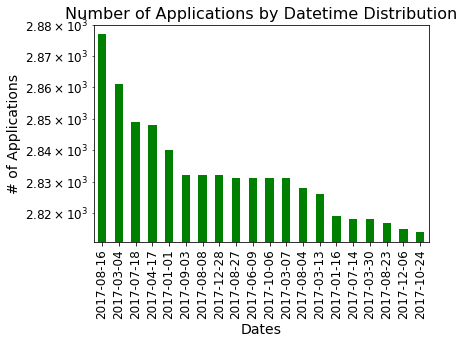

In [99]:
data['date'].value_counts().head(20).plot(kind='bar', logy = True, color = 'green', fontsize = 12)
#data.plot.hist(bins=12, alpha=0.5)
plt.title(label = "Number of Applications by Datetime Distribution",
          fontsize = 16)
plt.xlabel('Dates', fontsize = 14)
plt.ylabel('# of Applications', fontsize = 14)

## Categorical Fields: Bar chart or histogram or a table of the top 10 to 20 field values
- ssn, first name, last name, address, zip5, dob, homephone, fraud_label (IN THIS ORDER, double check)

## Bar Chart for SSN (COME BACK!!!!)

Text(0, 0.5, 'Frequency')

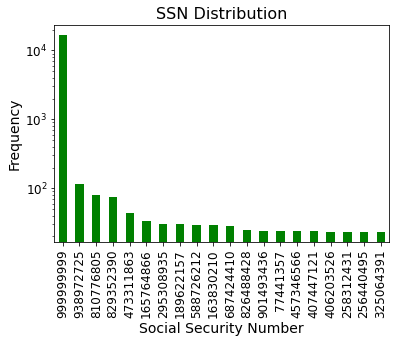

In [100]:
data['ssn'].value_counts().head(20).plot(kind='bar', logy = True, color = 'green', fontsize = 12)
plt.title('SSN Distribution', fontsize = 16)
plt.xlabel('Social Security Number', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

Text(0.5, 1.0, 'SSN Distribution (w/ 999999999)')

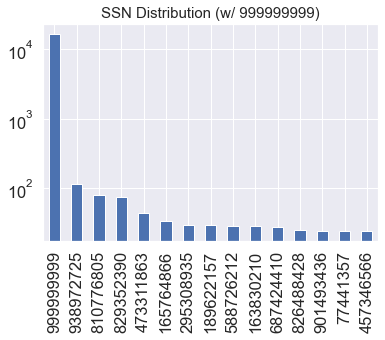

In [53]:
#OR =
sns.set(font_scale=1.5)
data['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.title(label = "SSN Distribution (w/ 999999999)",
          fontsize = 15)

Text(0.5, 1.0, 'SSN Distribution (w/o 999999999)')

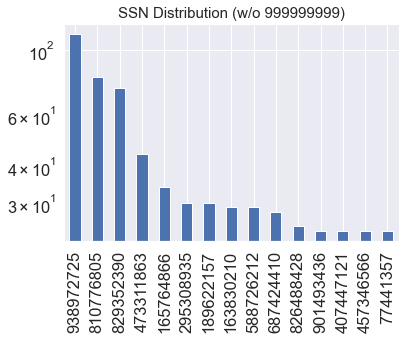

In [52]:
#Visual without SSN 999999999.
data_drop_ssn = data[data.ssn != 999999999]

sns.set(font_scale=1.5)
data_drop_ssn['ssn'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.title(label = "SSN Distribution (w/o 999999999)",
          fontsize = 15)

## Bar Chart for First Name

Text(0.5, 0, 'First Names')

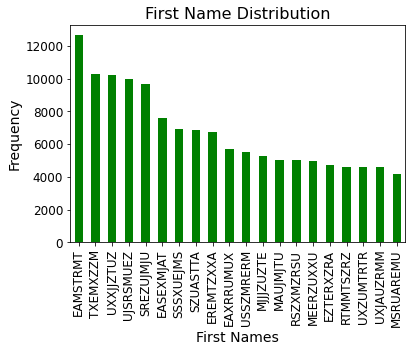

In [101]:
data['firstname'].value_counts().head(20).plot(kind='bar', color = 'green', fontsize = 12)
plt.title(label = "First Name Distribution",
          fontsize = 16)
plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('First Names', fontsize = 14)

## Bar Chart for Last Name

Text(0, 0.5, 'Frequency')

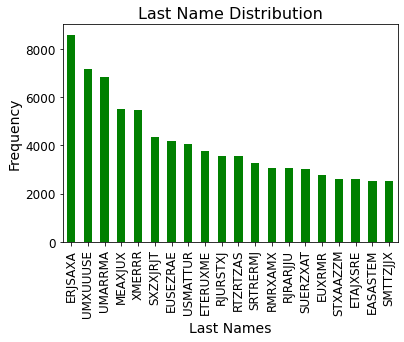

In [102]:
data['lastname'].value_counts().head(20).plot(kind='bar', color = 'green', fontsize = 12)
plt.title(label = "Last Name Distribution",
          fontsize = 16)
plt.xlabel('Last Names', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

## Bar Chart for Address

Text(0, 0.5, 'Frequency (Logged)')

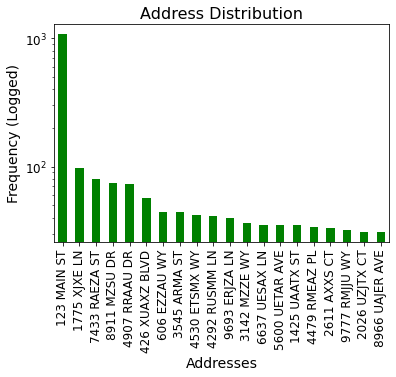

In [103]:
data['address'].value_counts().head(20).plot(kind='bar', logy = True, color = 'green', fontsize = 12)
plt.title(label = "Address Distribution",
          fontsize = 16)
plt.xlabel('Addresses', fontsize = 14)
plt.ylabel('Frequency (Logged)', fontsize =14)

## Bar Chart for zip5

Text(0, 0.5, 'Frequency (Logged)')

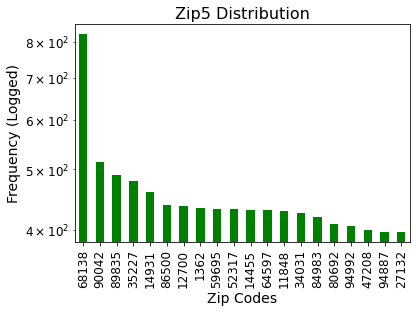

In [104]:
data['zip5'].value_counts().head(20).plot(kind='bar', color = 'green', logy = True, fontsize = 12)
plt.title(label = "Zip5 Distribution",
          fontsize = 16)
plt.xlabel('Zip Codes', fontsize = 14)
plt.ylabel('Frequency (Logged)', fontsize = 14)

## Bar Chart for DoB

Text(0, 0.5, 'Frequency (Logged)')

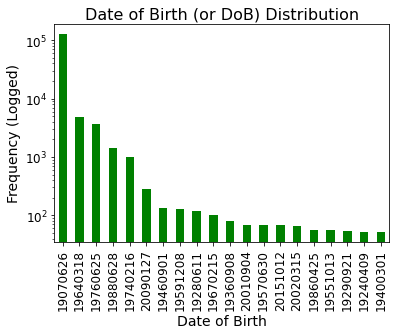

In [105]:
data['dob'].value_counts().head(20).plot(kind='bar', logy = True, color = 'green', fontsize = 12)
plt.title(label = "Date of Birth (or DoB) Distribution",
          fontsize = 16)
plt.xlabel('Date of Birth', fontsize = 14)
plt.ylabel('Frequency (Logged)', fontsize = 14)

Text(0.5, 1.0, 'DoB Distribution (w/o 1907)')

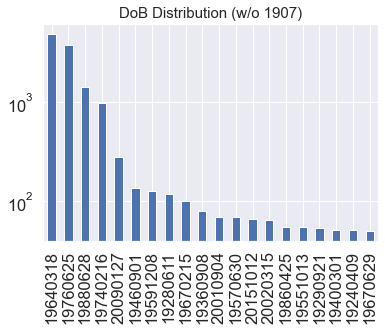

In [45]:
data_drop_dob = data[data.dob != 19070626]

sns.set(font_scale=1.5)
data_drop_dob['dob'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log')
plt.title(label = "DoB Distribution (w/o 1907)",
          fontsize = 15)

## Bar Chart for Homephone

Text(0, 0.5, 'Frequency (Logged)')

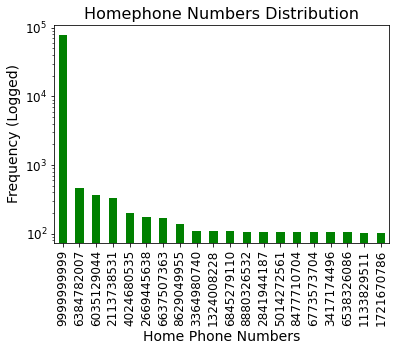

In [106]:
data['homephone'].value_counts().head(20).plot(kind='bar', logy = True, color = 'green', fontsize = 12)
plt.title(label = "Homephone Numbers Distribution",
          fontsize = 16)
plt.xlabel('Home Phone Numbers', fontsize = 14)
plt.ylabel('Frequency (Logged)', fontsize = 14)

Text(0.5, 1.0, 'Homephone Numbers Distribution (w/o 999999999)')

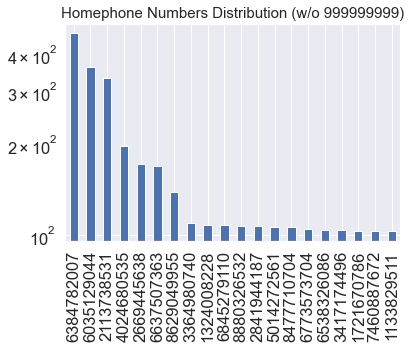

In [65]:
data_drop_homephone = data[data.homephone != 9999999999]

sns.set(font_scale=1.5)
data_drop_homephone['homephone'].value_counts().head(20).plot(kind = 'bar')
plt.yscale('log') #logging the distribution
plt.title(label = "Homephone Numbers Distribution (w/o 999999999)",
          fontsize = 15)

## Fraud Label Grouped Bar Chart

Text(0.5, 47.83999999999999, 'Not Fraud (0) vs Fraud (1)')

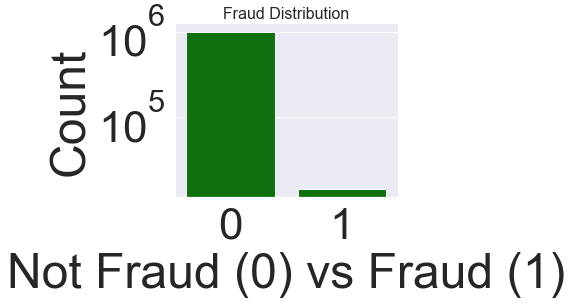

In [122]:
# The following barchart show the distribution of not fraud vs fraud
sns.catplot(x = 'fraud_label', kind = 'count', data = data, color = 'green')
plt.yscale('log')
plt.title(label = "Fraud Distribution",
          fontsize = 16)
plt.ylabel("Count")
plt.xlabel("Not Fraud (0) vs Fraud (1)")

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

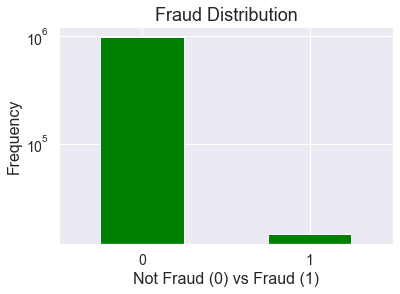

In [128]:
data['fraud_label'].value_counts().head(2).plot(kind='bar', logy = True, color = 'green', fontsize = 14)
plt.title(label = "Fraud Distribution",
          fontsize = 18)
plt.xlabel('Not Fraud (0) vs Fraud (1)', fontsize = 16)
plt.ylabel('Frequency', fontsize = 16)
plt.xticks(rotation = 0)